In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 500)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.csv', 'train.csv']


## Load Train and Test Data

In [2]:
train_input = pd.read_csv("../input/train.csv")
print(train_input.shape)

train_X = train_input.iloc[:, :-1]
train_X.head()

(3000, 23)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."


In [3]:
train_Y = train_input.iloc[:, -1]
train_Y.head()

0    12314651
1    95149435
2    13092000
3    16000000
4     3923970
Name: revenue, dtype: int64

In [4]:
test_input = pd.read_csv("../input/test.csv")
test = pd.read_csv("../input/test.csv")
print(test.shape)
test.head()

(4398, 22)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


## Data Preprocessing

### Drop Columns

In [5]:
train_X = train_X.drop(columns=["homepage", "imdb_id", "poster_path", "status"])
test = test.drop(columns=["homepage", "imdb_id", "poster_path", "status"])

train_X.head()

,id,belongs_to_collection,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,tagline,title,Keywords,cast,crew
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,마린보이,Marine Boy is the story of a former national s...,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."


### Categorical to Numeric Tranformation
#### original_language

ratio of ocurrences of "en" to all data: 0.858333


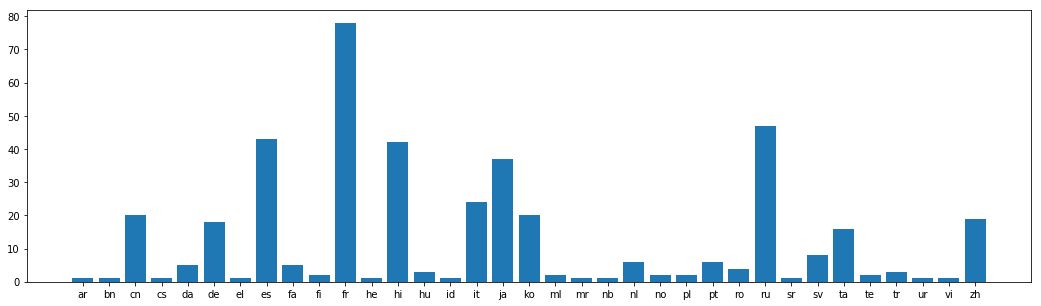

Languages that make up at least 1.0% of the data ['en', 'es', 'fr', 'hi', 'ja', 'ru']
Data % represented: 0.9406666666666667
   language_en  language_es  language_fr  language_hi  language_ja  \
0            1            0            0            0            0   
1            1            0            0            0            0   
2            1            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   language_ru  
0            0  
1            0  
2            0  
3            0  
4            0  
ratio of ocurrences of "en" to all data: 0.858572


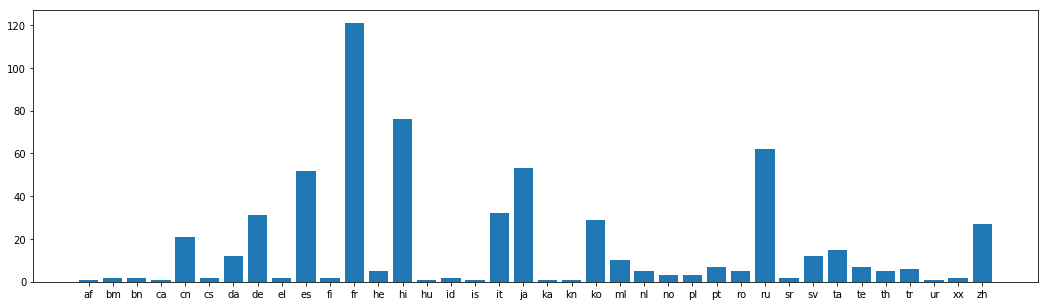

Languages that make up at least 1.0% of the data ['en', 'es', 'fr', 'hi', 'ja', 'ru']
Data % represented: 0.9413369713506139
   language_en  language_es  language_fr  language_hi  language_ja  \
0            0            0            0            0            1   
1            1            0            0            0            0   
2            1            0            0            0            0   
3            0            0            1            0            0   
4            1            0            0            0            0   

   language_ru  
0            0  
1            0  
2            0  
3            0  
4            0  


In [6]:
def transformLanguageColumn(data):
    print("ratio of ocurrences of \"en\" to all data: %f" % (len([i for i in data["original_language"] if i == "en"])/len(data["original_language"])))

    unique, counts = np.unique([i for i in data["original_language"]], return_counts=True)
    language_counts = dict(zip(unique, counts))

    plt.figure(figsize=(18, 5))
    plt.bar(*np.unique([i for i in data["original_language"] if i != "en"], return_counts=True))
    plt.show()

    percentage_required = 0.01

    languages = [i for i in language_counts.keys() if language_counts[i]/len(data["original_language"]) > percentage_required]

    print("Languages that make up at least " + str(percentage_required * 100) + "% of the data " + str(languages))
    print("Data % represented: " + str(len([i for i in data["original_language"] if i in languages])/len(data["original_language"])))

    one_hot_lang = pd.get_dummies(pd.Categorical(data["original_language"]), prefix="language")[["language_" + i for i in languages]]
    print(one_hot_lang.head())

    data = pd.concat([data.drop(columns="original_language"), one_hot_lang], axis=1)
    
    return data

train_X = transformLanguageColumn(train_X)
test = transformLanguageColumn(test)

#### belongs_to_collection

In [7]:
import ast

def transformBelongsToCollection(data):
    btc = data["belongs_to_collection"].apply(lambda x: [i["id"] for i in ast.literal_eval(x)] if type(x) == str else [])
    print(len(np.unique(btc)))

    # high cardinality, will try using if it belongs to a collection or not as a feature instead

    btc = data["belongs_to_collection"].apply(lambda x: 1 if type(x) == str else 0)
    btc.head()

    data["belongs_to_collection"] = btc
    return data

train_X = transformBelongsToCollection(train_X)
test = transformBelongsToCollection(test)

423
557


In [8]:
from typing import List, Set, Dict, Tuple
from collections import defaultdict
import operator

def get_list_of_dicts_col(data, col_name: str, dict_key: str= None) -> List[List]:
    if dict_key is None:
        return [ast.literal_eval(i) if type(i) == str else [] for i in data[col_name]]
    else:
        return [[x[dict_key] for x in ast.literal_eval(i)] if type(i) == str else [] for i in data[col_name]]

def get_sorted_unique_value_count_in_list_of_lists(list_of_lists: str or List[List], col_name: str = None, dict_key: str= None) -> List[Tuple]:
    item_count = defaultdict(int)
    
    if type(list_of_lists) == str:
        assert col_name is not None and dict_key is not None, "specify the column name dict key for which to count unique values"
        list_of_lists = get_list_of_dicts_col(col_name, dict_key)

    for list_ in list_of_lists:
        for item in list_:
            item_count[item] += 1

    return sorted(item_count.items(), key=operator.itemgetter(1), reverse=True)

def unzip_tuples(list_of_tuples: List[Tuple]) -> List[List]:
    return [list(i) for i in list(list(zip(*list_of_tuples)))]

def get_items_with_minimum_percentage(percentage: float, list_of_tuples: List[Tuple], col_name: str) -> List[Tuple]:
    return [i for i in list_of_tuples if i[1]/len(train_input[col_name]) > percentage]

def get_one_hot_df(columns: List, list_of_item_lists: List[List], column_name_prepend: str) -> pd.DataFrame:
    one_hot_df = pd.DataFrame(columns=[column_name_prepend + str(i) for i in columns])

    for item_list in list_of_item_lists:
        row = []
        for item in columns:
            if item in item_list:
                row.append(1)
            else:
                row.append(0)
            
        one_hot_df = one_hot_df.append(pd.DataFrame([row], columns=[column_name_prepend + str(i) for i in columns]), ignore_index=True)
    return one_hot_df

#### genres

In [9]:
def transformGenre(data, genre_list=None):
    genre_col = get_list_of_dicts_col(data, "genres", "id")

    if genre_list is None:
        genre_count_tuples = get_sorted_unique_value_count_in_list_of_lists(genre_col)
        genre_list = unzip_tuples(genre_count_tuples)[0]
        print("Number of unique genres: %d" % len(genre_count_tuples))
        print(genre_list)
    else:
        print("Making one hot columns using list:\n" + str(genre_list))

    one_hot_genre = get_one_hot_df(genre_list, genre_col, "genre_")
    return pd.concat([data.drop(columns="genres"), one_hot_genre], axis=1), genre_list

train_X, genre_list = transformGenre(train_X)
test, _ = transformGenre(test, genre_list)

Number of unique genres: 20
[18, 35, 53, 28, 10749, 80, 12, 27, 878, 10751, 14, 9648, 16, 36, 10402, 10752, 99, 37, 10769, 10770]
Making one hot columns using list:
[18, 35, 53, 28, 10749, 80, 12, 27, 878, 10751, 14, 9648, 16, 36, 10402, 10752, 99, 37, 10769, 10770]


#### production_countries

Number of unique countries: 74


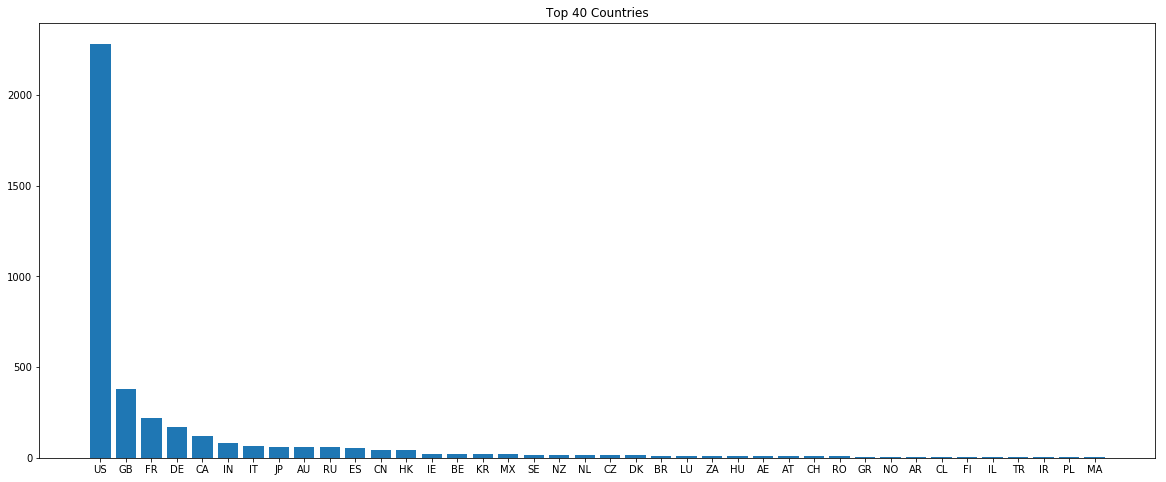

Countries that make up at least 1.0% of the data ['US', 'GB', 'FR', 'DE', 'CA', 'IN', 'IT', 'JP', 'AU', 'RU', 'ES', 'CN', 'HK']
Making one hot columns using list:
['US', 'GB', 'FR', 'DE', 'CA', 'IN', 'IT', 'JP', 'AU', 'RU', 'ES', 'CN', 'HK']


In [10]:
def transformProductionCountries(data, countries_list=None):
    country_col = get_list_of_dicts_col(data, "production_countries", "iso_3166_1")
    
    if countries_list is None:
        country_count_tuples = get_sorted_unique_value_count_in_list_of_lists(country_col)
        
        print("Number of unique countries: %d" % len(country_count_tuples))
        
        countries_list = unzip_tuples(country_count_tuples)[0]
        
        countries_counts_list = unzip_tuples(country_count_tuples)[1]
        plt.figure(figsize=(20,8))
        plt.bar(countries_list[:40], countries_counts_list[:40])
        plt.title("Top 40 Countries")
        plt.show()
        
        percentage_required = 0.01
        
        country_count_tuples = get_items_with_minimum_percentage(percentage_required, country_count_tuples, "production_countries")
        
        countries_list = unzip_tuples(country_count_tuples)[0]
        countries_counts_list = unzip_tuples(country_count_tuples)[1]

        print("Countries that make up at least " + str(percentage_required * 100) + "% of the data " + str(countries_list))
        
    else:
        print("Making one hot columns using list:\n" + str(countries_list))

    one_hot_country = get_one_hot_df(countries_list, country_col, "country_")
    return pd.concat([data.drop(columns="production_countries"), one_hot_country], axis=1), countries_list

train_X, countries_list = transformProductionCountries(train_X)
test, _ = transformProductionCountries(test, countries_list)

#### production_companies

Number of unique companies: 3712


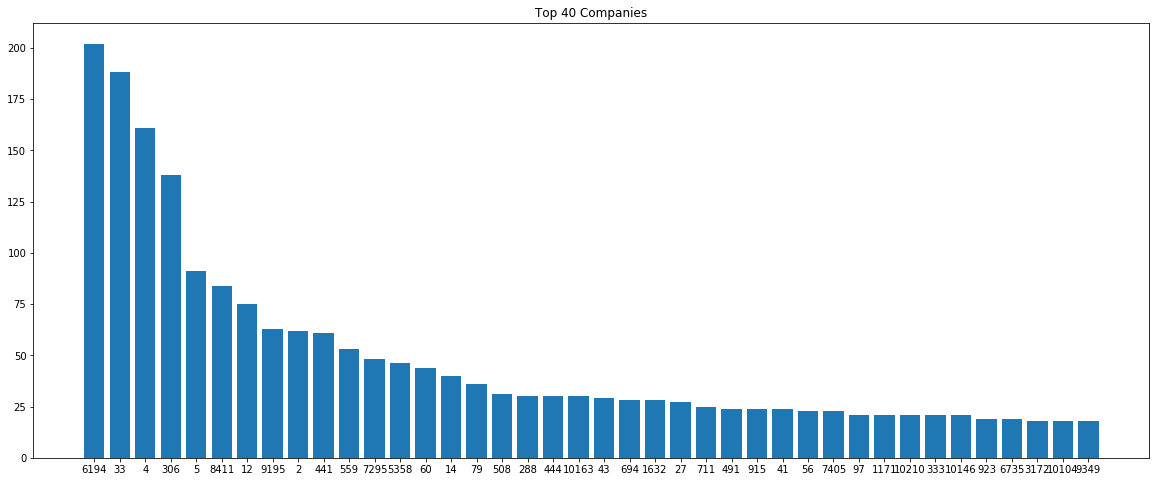

Companies that make up at least 1.0% of the data [6194, 33, 4, 306, 5, 8411, 12, 9195, 2, 441, 559, 7295, 5358, 60, 14, 79, 508]
Making one hot columns using list:
[6194, 33, 4, 306, 5, 8411, 12, 9195, 2, 441, 559, 7295, 5358, 60, 14, 79, 508]


In [11]:
def transformProductionCompanies(data, companies_list=None):
    company_col = get_list_of_dicts_col(data, "production_companies", "id")
    
    if companies_list is None:
        company_count_tuples = get_sorted_unique_value_count_in_list_of_lists(company_col)

        print("Number of unique companies: %d" % len(company_count_tuples))

        companies_list = unzip_tuples(company_count_tuples)[0]
        companies_counts_list = unzip_tuples(company_count_tuples)[1]

        plt.figure(figsize=(20,8))
        plt.bar([str(i) for i in companies_list[:40]], companies_counts_list[:40])
        plt.title("Top 40 Companies")
        plt.show()
        
        percentage_required = 0.01

        company_count_tuples = get_items_with_minimum_percentage(percentage_required, company_count_tuples, "production_companies")

        companies_list = unzip_tuples(company_count_tuples)[0]
        companies_counts_list = unzip_tuples(company_count_tuples)[0]

        print("Companies that make up at least " + str(percentage_required * 100) + "% of the data " + str(companies_list))
        
    else:
        print("Making one hot columns using list:\n" + str(companies_list))

    one_hot_company = get_one_hot_df(companies_list, company_col, "company_")
    return pd.concat([data.drop(columns="production_companies"), one_hot_company], axis=1), companies_list

train_X, companies_list = transformProductionCompanies(train_X)
test, _ = transformProductionCompanies(test, companies_list)

#### Keywords

Number of unique keywords: 7400


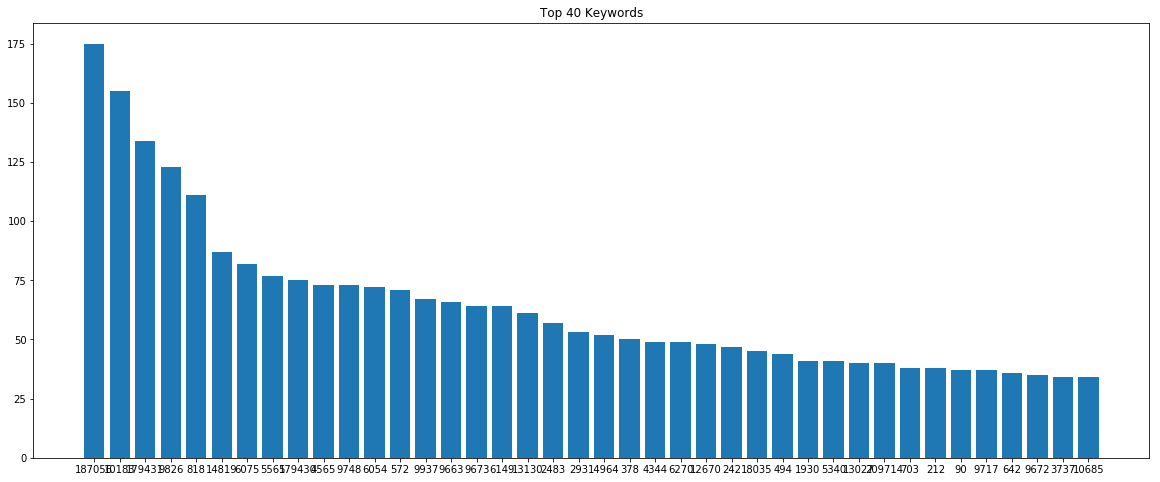

Number of keywords used for one hot encoding: 18
Making one hot columns using list:
[187056, 10183, 179431, 9826, 818, 14819, 6075, 5565, 179430, 4565, 9748, 6054, 572, 9937, 9663, 9673, 6149, 13130]


In [12]:
def transformKeywords(data, keywords_list=None):
    keywords_col = get_list_of_dicts_col(data, "Keywords", "id")
    
    if keywords_list is None:
        keywords_count_tuples = get_sorted_unique_value_count_in_list_of_lists(keywords_col)

        print("Number of unique keywords: %d" % len(keywords_count_tuples))

        keywords_list = unzip_tuples(keywords_count_tuples)[0]
        keywords_counts_list = unzip_tuples(keywords_count_tuples)[1]

        plt.figure(figsize=(20,8))
        plt.bar([str(i) for i in keywords_list[:40]], keywords_counts_list[:40])
        plt.title("Top 40 Keywords")
        plt.show()
        
        percentage_required = 0.02

        keywords_count_tuples = get_items_with_minimum_percentage(percentage_required, keywords_count_tuples, "Keywords")

        keywords_list = unzip_tuples(keywords_count_tuples)[0]
        keywords_counts_list = unzip_tuples(keywords_count_tuples)[1]

        print("Number of keywords used for one hot encoding: " + str(len(keywords_list)))
    else:
        print("Making one hot columns using list:\n" + str(keywords_list))

    one_hot_keywords = get_one_hot_df(keywords_list, keywords_col, "keyword_")

    return pd.concat([data.drop(columns="Keywords"), one_hot_keywords], axis=1), keywords_list

train_X, keywords_list = transformKeywords(train_X)
test, _ = transformKeywords(test, keywords_list)

#### Cast

Number of unique cast: 38760


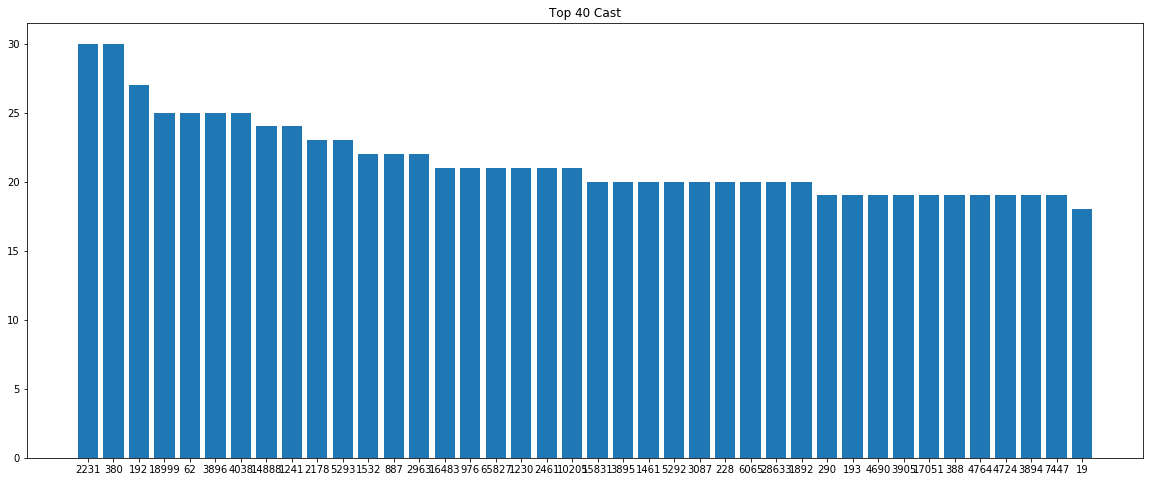

In [13]:
cast_col = get_list_of_dicts_col(train_X, "cast", "id")
cast_count_tuples = get_sorted_unique_value_count_in_list_of_lists(cast_col)
    
print("Number of unique cast: %d" % len(cast_count_tuples))

cast_list = unzip_tuples(cast_count_tuples)[0]
cast_counts_list = unzip_tuples(cast_count_tuples)[1]

plt.figure(figsize=(20,8))
plt.bar([str(i) for i in cast_list[:40]], cast_counts_list[:40])
plt.title("Top 40 Cast")
plt.show()

train_X = train_X.drop(columns="cast")
test = test.drop(columns="cast")

#### crew

Number of unique crew: 38897


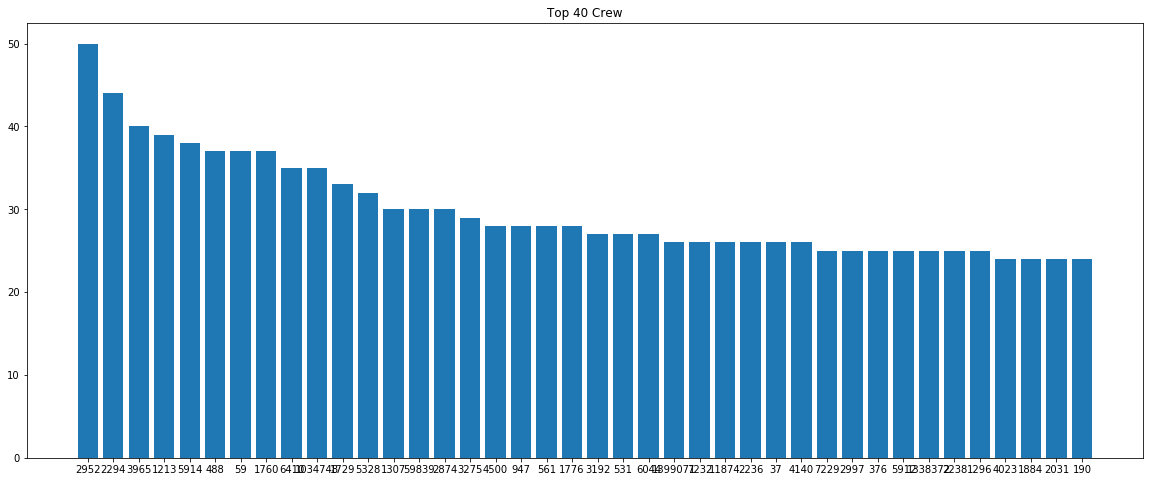

In [14]:
crew_col = get_list_of_dicts_col(train_X, "crew", "id")
crew_count_tuples = get_sorted_unique_value_count_in_list_of_lists(crew_col)
    
print("Number of unique crew: %d" % len(crew_count_tuples))

crew_list = unzip_tuples(crew_count_tuples)[0]
crew_counts_list = unzip_tuples(crew_count_tuples)[1]

plt.figure(figsize=(20,8))
plt.bar([str(i) for i in crew_list[:40]], crew_counts_list[:40])
plt.title("Top 40 Crew")
plt.show()

train_X = train_X.drop(columns="crew")
test = test.drop(columns="crew")

#### Drop temp

In [15]:
train_X = train_X.drop(columns=["original_title", "overview", "tagline", "title", "spoken_languages"])
test = test.drop(columns=["original_title", "overview", "tagline", "title", "spoken_languages"])

#### release_date

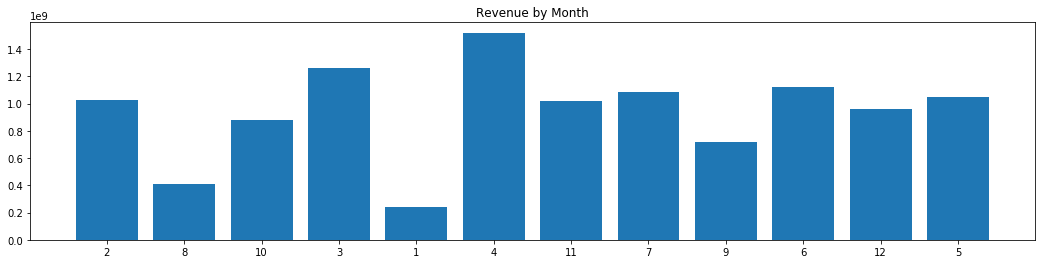

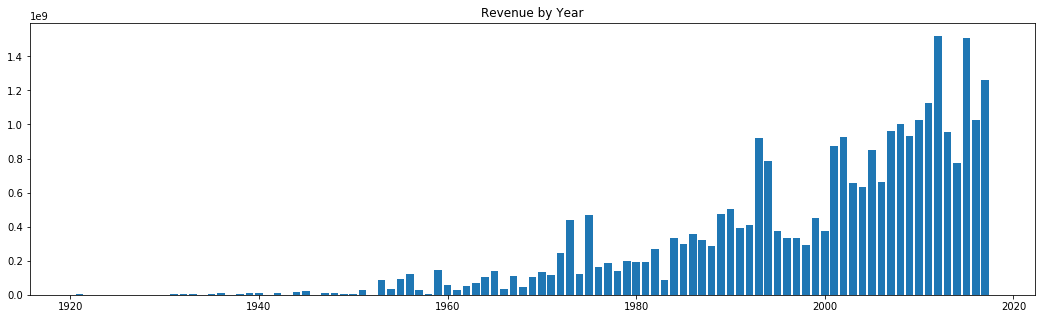

In [16]:
date_months = train_input["release_date"].apply(lambda x: x[0: x.find("/")]).rename("release_date_month")
date_years = train_input["release_date"].apply(lambda x: 2000 + int(x[-2:]) if int(x[-2:]) < 19 and int(x[-2:]) >= 0 else 1900 + int(x[-2:])).rename("release_date_year")

plt.figure(figsize=(18,4))
plt.bar(date_months, train_input["revenue"])
plt.title("Revenue by Month")
plt.show()

plt.figure(figsize=(18,5))
plt.bar(date_years, train_input["revenue"])
plt.title("Revenue by Year")
plt.show()

train_X = pd.concat([pd.concat([train_X.drop(columns="release_date"), date_months], axis=1), date_years], axis=1)

test["release_date"] = test["release_date"].fillna("00/00/00")

date_months = test["release_date"].apply(lambda x: x[0: x.find("/")]).rename("release_date_month")
date_years = test["release_date"].apply(lambda x: 2000 + int(x[-2:]) if int(x[-2:]) < 19 and int(x[-2:]) >= 0 else 1900 + int(x[-2:])).rename("release_date_year")

test = pd.concat([pd.concat([test.drop(columns="release_date"), date_months], axis=1), date_years], axis=1)

#### Normalize Data

In [17]:
from sklearn import preprocessing

#budget, popularity, runtime scaler
bpr_scaler = preprocessing.StandardScaler().fit(train_input[["budget", "popularity", "runtime"]])
print("means: " + str(bpr_scaler.mean_))
train_X[["budget", "popularity", "runtime"]] = bpr_scaler.transform(train_input[["budget", "popularity", "runtime"]])
test[["budget", "popularity", "runtime"]] = bpr_scaler.transform(test[["budget", "popularity", "runtime"]])

means: [2.25313341e+07 8.46327420e+00 1.07856571e+02]


C:\Users\shaya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\shaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


#### Drop id

In [18]:
train_X = train_X.drop(columns="id")
train_X.head()

test = test.drop(columns="id")
test.head()

,belongs_to_collection,budget,popularity,runtime,language_en,language_es,language_fr,language_hi,language_ja,language_ru,genre_18,genre_35,genre_53,genre_28,genre_10749,genre_80,genre_12,genre_27,genre_878,genre_10751,genre_14,genre_9648,genre_16,genre_36,genre_10402,genre_10752,genre_99,genre_37,genre_10769,genre_10770,country_US,country_GB,country_FR,country_DE,country_CA,country_IN,country_IT,country_JP,country_AU,country_RU,country_ES,country_CN,country_HK,company_6194,company_33,company_4,company_306,company_5,company_8411,company_12,company_9195,company_2,company_441,company_559,company_7295,company_5358,company_60,company_14,company_79,company_508,keyword_187056,keyword_10183,keyword_179431,keyword_9826,keyword_818,keyword_14819,keyword_6075,keyword_5565,keyword_179430,keyword_4565,keyword_9748,keyword_6054,keyword_572,keyword_9937,keyword_9663,keyword_9673,keyword_6149,keyword_13130,release_date_month,release_date_year
0,1,-0.608627,-0.381073,-0.808621,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2007
1,0,-0.606250,-0.405180,-1.940726,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,5,1958
2,0,-0.608627,-0.031241,-0.355779,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,5,1997
3,0,-0.424942,0.010968,1.002748,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,2010
4,0,-0.554602,-0.433449,-0.718052,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2005


### Data Analysis

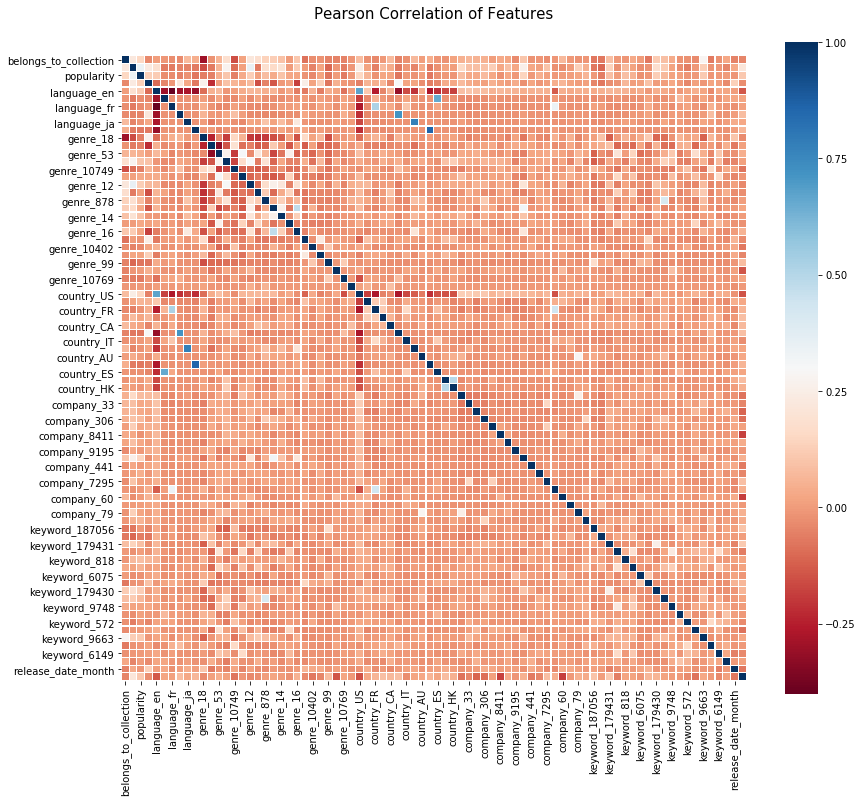

In [19]:
import seaborn as sns

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_X.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white')

In [20]:
print("Number of NaNs in runtime: %d" % train_input["runtime"].isnull().sum())
train_X["runtime"] = train_X["runtime"].fillna(bpr_scaler.mean_[2])

Number of NaNs in runtime: 2


In [27]:
print("Number of NaNs in runtime: %d" % test_input["runtime"].isnull().sum())
test["runtime"] = test["runtime"].fillna(bpr_scaler.mean_[2])

Number of NaNs in runtime: 4


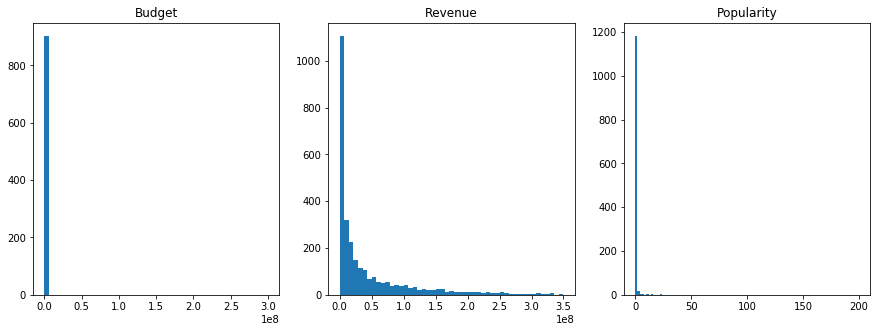

In [28]:
poster_url_head = "https://image.tmdb.org/t/p/w600_and_h900_bestv2"
from functools import reduce

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.hist(train_X["budget"], bins=np.linspace(0, 3e8, 50))
plt.title("Budget")

plt.subplot(132)
plt.hist(train_Y, bins=np.linspace(0, 3.5e8, 50))
plt.title("Revenue")

plt.subplot(133)
plt.hist(train_X["popularity"], bins=np.linspace(0, 200, 100))
plt.title("Popularity")
plt.show()

#### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
seed = 42

train_split_X, test_split_X, train_split_Y, test_split_Y = train_test_split(train_X, train_Y, test_size=0.30, random_state=seed)

### Linear Regression

In [36]:
import sklearn.linear_model
from sklearn.compose import TransformedTargetRegressor
import sklearn.metrics
import math

def linearRegression(train_X, train_Y, test_X, test_Y):
#     model = TransformedTargetRegressor(
#         regressor=sklearn.linear_model.LinearRegression(fit_intercept=True),
#         func=np.log1p,
#         inverse_func=np.expm1
#     )
    def predict(X):
        return model.predict(X)
    
    model = sklearn.linear_model.LinearRegression(fit_intercept=True)
    model.fit(train_X, train_Y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    
    return {"train_pred": train_pred,
            "test_pred": test_pred,
            "predict":model.predict,
            "train_msle": sklearn.metrics.mean_squared_error(train_Y, train_pred), 
            "test_msle": sklearn.metrics.mean_squared_error(test_Y, test_pred),
            "train_r2": sklearn.metrics.r2_score(train_Y, train_pred),
            "test_r2": sklearn.metrics.r2_score(test_Y, test_pred)}

def plotErrorHistogram(pred, actual, title=None):
    pred_test_tuples = zip(pred, actual)
    squared_errors = [(i[0] - i[1])**2 for i in pred_test_tuples]
    plt.hist(squared_errors,  label="Squared Error")
    plt.title(title)
    plt.legend(loc='best')

In [44]:
lin_reg_result = linearRegression(train_split_X, train_split_Y, test_split_X, test_split_Y)
pd.DataFrame([list(lin_reg_result.values())[3:]], columns=list(list(lin_reg_result.keys())[3:]))

,test_msle,train_r2,test_r2
0,6.156332e+15,0.677425,0.611445


In [45]:
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot

def decisionTreeRegression(train_X, train_Y, test_X, test_Y, max_depth=None, min_samples_leaf=1):
#     model = TransformedTargetRegressor(
#         regressor=sklearn.linear_model.LinearRegression(fit_intercept=True),
#         func=np.log1p,
#         inverse_func=np.expm1
#     )
    def predict(X):
        return model.predict(X)
    
    def showTree():
        dot_data = StringIO()
        export_graphviz(model, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
        (graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
        return Image(graph.create_png())
    
    model = tree.DecisionTreeRegressor(random_state=42, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    model.fit(train_X, train_Y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    
    
    
    return {"train_pred": train_pred,
            "test_pred": test_pred,
            "image": showTree,
            "predict":model.predict,
            "train_msle": sklearn.metrics.mean_squared_log_error(train_Y, train_pred), 
            "test_msle": sklearn.metrics.mean_squared_log_error(test_Y, test_pred),
            "train_r2": sklearn.metrics.r2_score(train_Y, train_pred),
            "test_r2": sklearn.metrics.r2_score(test_Y, test_pred)}

In [46]:
dt_reg_result = decisionTreeRegression(train_split_X, train_split_Y, test_split_X, test_split_Y, max_depth=10, min_samples_leaf=20)
pd.DataFrame([list(dt_reg_result.values())[4:]], columns=list(list(dt_reg_result.keys())[4:]))

,train_msle,test_msle,train_r2,test_r2
0,6.116029,5.606501,0.691194,0.650597


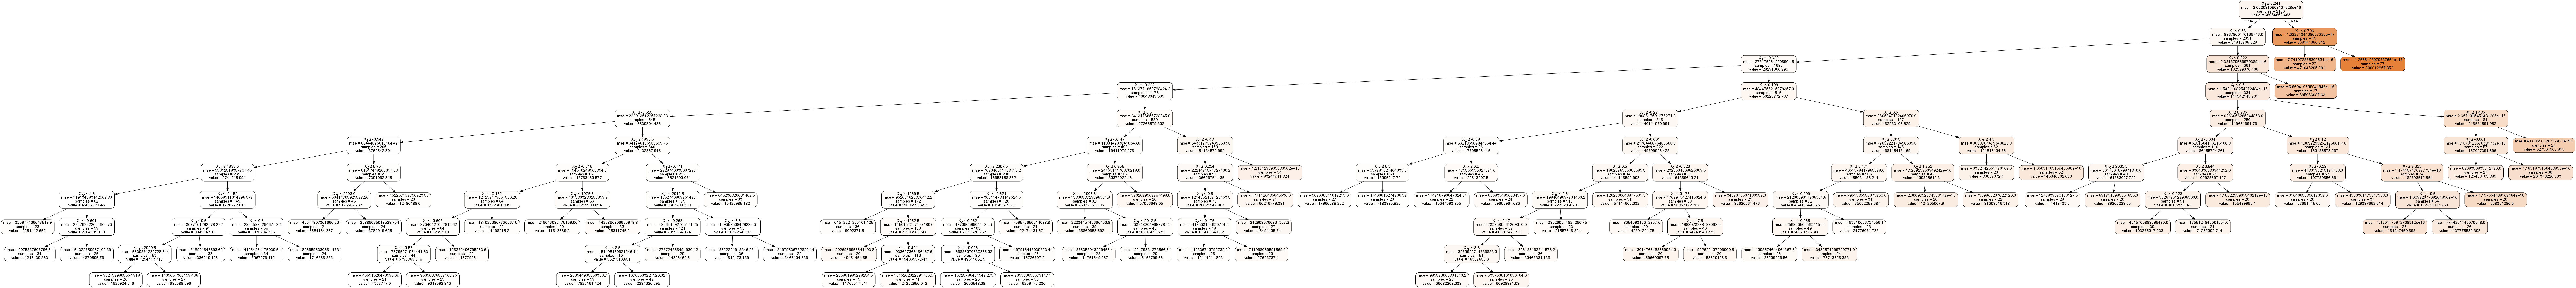

In [47]:
dt_reg_result["image"]()

In [48]:
from sklearn.ensemble import RandomForestRegressor

def randomForestRegression(train_X, train_Y, test_X, test_Y, n_estimators=10, max_depth=None, min_samples_leaf=1):
#     model = TransformedTargetRegressor(
#         regressor=sklearn.linear_model.LinearRegression(fit_intercept=True),
#         func=np.log1p,
#         inverse_func=np.expm1
#     )
    
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    model.fit(train_X, train_Y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    
    return {"train_pred": train_pred,
            "test_pred": test_pred,
            "predict":model.predict,
            "train_msle": sklearn.metrics.mean_squared_log_error(train_Y, train_pred), 
            "test_msle": sklearn.metrics.mean_squared_log_error(test_Y, test_pred),
            "train_r2": sklearn.metrics.r2_score(train_Y, train_pred),
            "test_r2": sklearn.metrics.r2_score(test_Y, test_pred)}

In [49]:
rf_reg_result = randomForestRegression(train_split_X, train_split_Y, test_split_X, test_split_Y, max_depth=10, min_samples_leaf=20)
pd.DataFrame([list(rf_reg_result.values())[3:]], columns=list(list(rf_reg_result.keys())[3:]))

,train_msle,test_msle,train_r2,test_r2
0,6.807859,5.939896,0.690988,0.65573


In [50]:
rf_reg_result = randomForestRegression(train_split_X, train_split_Y, test_split_X, test_split_Y, n_estimators=16, max_depth=10, min_samples_leaf=20)
pd.DataFrame([list(rf_reg_result.values())[3:]], columns=list(list(rf_reg_result.keys())[3:]))

,train_msle,test_msle,train_r2,test_r2
0,6.794746,5.954116,0.690377,0.658707


In [66]:
import csv

def writePredictionToCsv(result_list):
    with open("submission.csv", "w", newline='') as outfile:
        writer = csv.writer(outfile)
        writer.writerow(["id", "revenue"])
        arr = [[i[1], i[0]] for i in zip(result_list, range(3001, len(result_list) + 3001))]
        for a in arr:
            writer.writerow(a)
    
writePredictionToCsv(rf_reg_result["predict"](test))